# CAPM & Beta Estimation
Goal: Estimate a stock's beta (sensitivity to market returns), alpha, and visualize Security Characteristic Line (SCL).


In [14]:
!pip install yfinance statsmodels --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

plt.style.use('default')


In [15]:
# Real data option (uncomment to use):
# data = yf.download(['AAPL', '^GSPC'], start='2018-01-01', end='2024-01-01')['Adj Close'].dropna()
# prices = data
# prices.columns = ['Stock', 'Market']

# Synthetic data fallback:
np.random.seed(1)
n = 500
dates = pd.date_range('2020-01-01', periods=n)
market = np.cumsum(np.random.normal(0, 1, n)) + 100
stock = market * 1.2 + np.random.normal(0, 5, n) + 10
prices = pd.DataFrame({'Market': market, 'Stock': stock}, index=dates)

prices.head()


,Market,Stock
2020-01-01,101.624345,123.352242
2020-01-02,101.012589,131.500712
2020-01-03,100.484417,126.583563
2020-01-04,99.411449,127.835765
2020-01-05,100.276856,129.037313


In [16]:
returns = prices.pct_change().dropna()
y = returns['Stock']
X = returns['Market']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Stock   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     13.21
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           0.000307
Time:                        18:48:13   Log-Likelihood:                 803.87
No. Observations:                 499   AIC:                            -1604.
Df Residuals:                     497   BIC:                            -1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.592      0.5

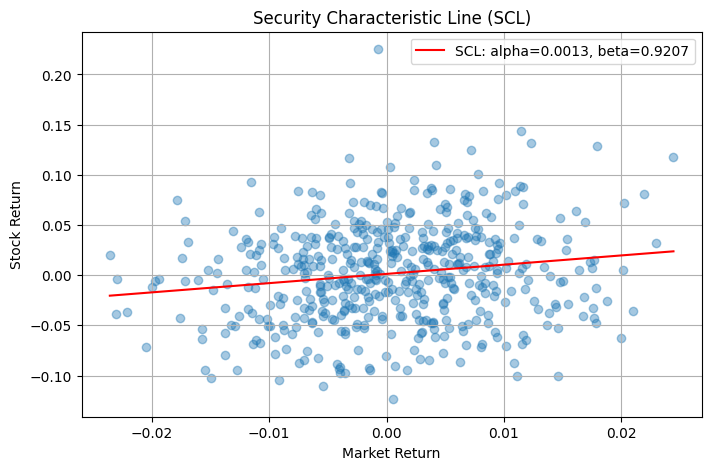

In [17]:
alpha = model.params['const']
beta = model.params['Market']

plt.figure(figsize=(8,5))
plt.scatter(returns['Market'], returns['Stock'], alpha=0.4)
x_line = np.linspace(returns['Market'].min(), returns['Market'].max(), 100)
plt.plot(x_line, alpha + beta * x_line, color='red', label=f'SCL: alpha={alpha:.4f}, beta={beta:.4f}')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.title('Security Characteristic Line (SCL)')
plt.legend()
plt.grid(True)
plt.show()


### Extensions
- Use Fama-French factors for multi-factor regression.
- Estimate rolling beta to analyze stability.
- Compare predicted expected return from CAPM with realized.
